# Avacado Price Prediction using Facebook Prophet

# Problem Statement

* Data represents weekly 2018 retail scan data for National retail volume (units) and price.
* Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
* The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
* The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
* Some relevant columns in the dataset:

> 1. Date - The date of the observation
> 2. AveragePrice - the average price of a single avocado
> 3. type - conventional or organic
> 4. year - the year
> 5. Region - the city or region of the observation
> 6. Total Volume - Total number of avocados sold
> 7. 4046 - Total number of avocados with PLU 4046 sold
> 8. 4225 - Total number of avocados with PLU 4225 sold
> 9. 4770 - Total number of avocados with PLU 4770 sold

* Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

* Prophet is open source software released by Facebook’s Core Data Science team.

* Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

* Prophet works best with time series that have strong seasonal effects and several seasons of historical data.

* For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/ https://facebook.github.io/prophet/docs/quick_start.html#python-api

* You can install fbprophet package as follows: conda install -c conda-forge fbprophet

# STEP 1: Importing the libraries/datasets

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from fbprophet import Prophet

In [0]:
# Import data from csv into dataframe
avocado_df = pd.read_csv('avocado.csv')

# STEP 2: Dataset Exploration/Visualization

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


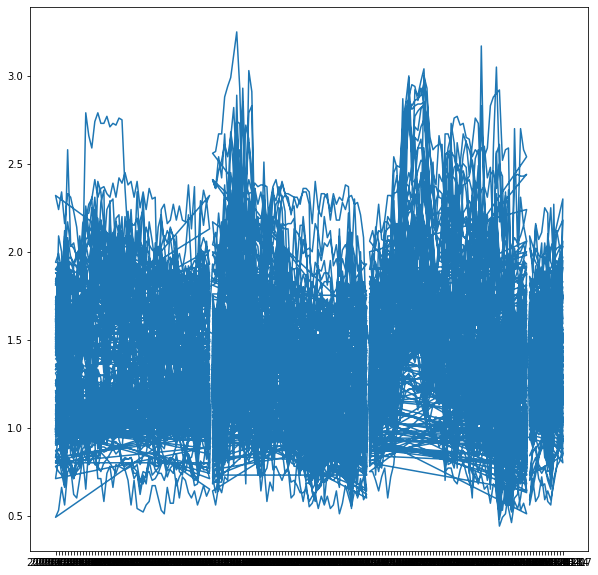

In [5]:
plt.figure(figsize = (10, 10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

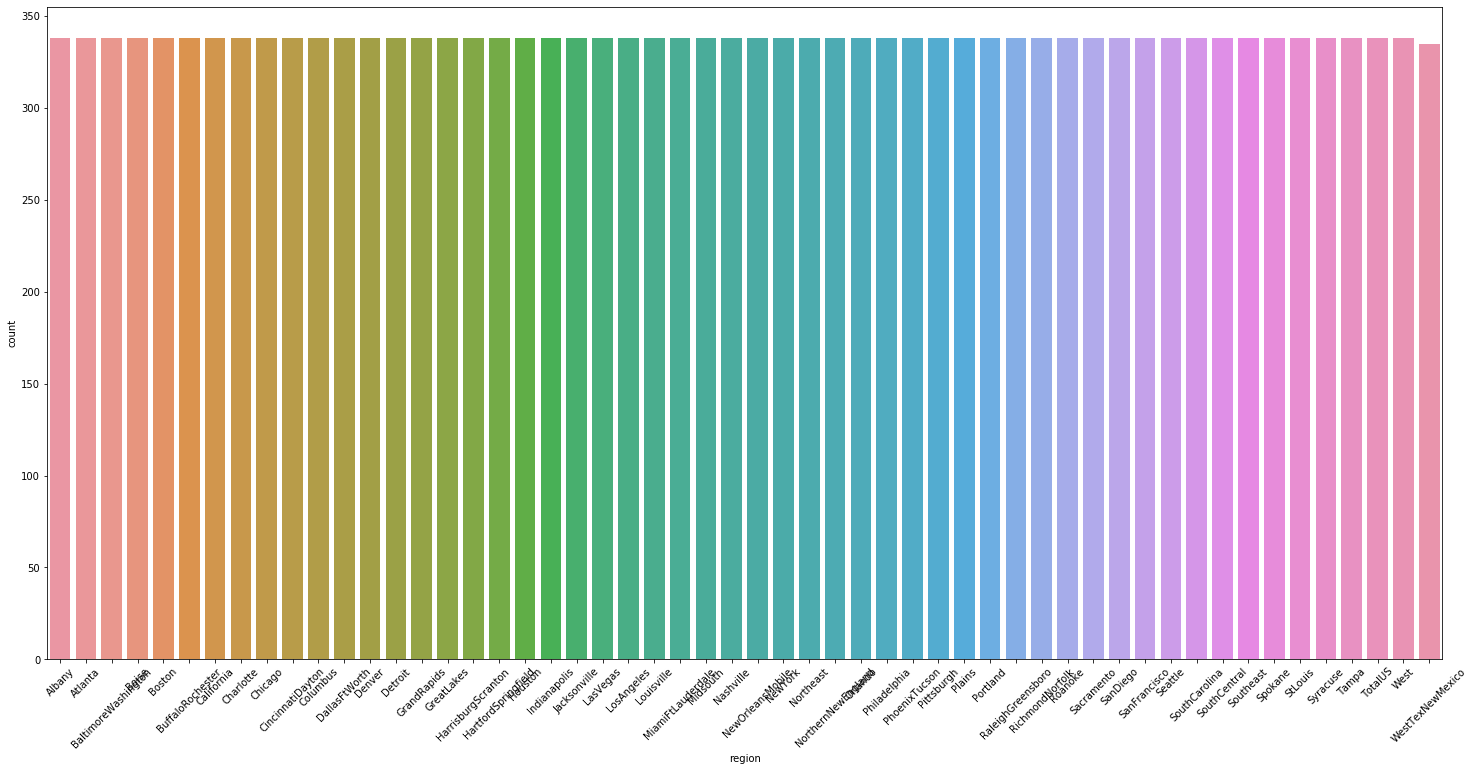

In [6]:
# Bar chart to visualize the prices by regions
plt.figure(figsize = (25, 12))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

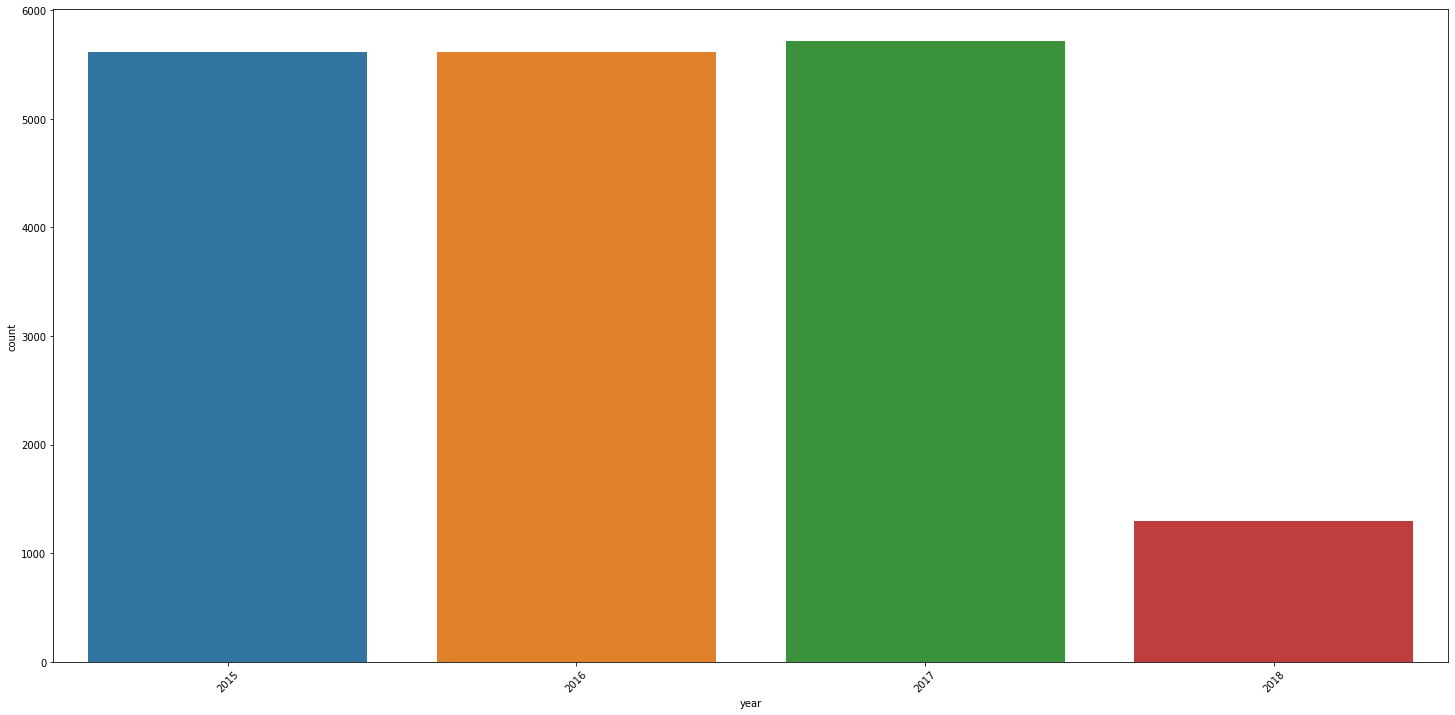

In [7]:
# Bar chart to visualize the prices by year
plt.figure(figsize = (25, 12))
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

In [0]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [0]:
# Rename the columns for using them with FB prophet
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [10]:
avocado_prophet_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


# STEP 3: Prediction

In [13]:
predictor = Prophet()
predictor.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Forecasting the predictions
future = predictor.make_future_dataframe(periods = 1095)
forecast = predictor.predict(future)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499585,0.897829,1.860775,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
1,2015-01-04,1.499585,0.877434,1.857757,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
2,2015-01-04,1.499585,0.900295,1.837511,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
3,2015-01-04,1.499585,0.900151,1.878844,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
4,2015-01-04,1.499585,0.908422,1.881019,1.499585,1.499585,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,-0.117661,0.0,0.0,0.0,1.381923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,2021-03-20,0.610896,-0.688864,1.931586,-0.496279,1.829411,-0.086605,-0.086605,-0.086605,-0.086605,-0.086605,-0.086605,0.0,0.0,0.0,0.524291
19340,2021-03-21,0.610149,-0.733218,1.895601,-0.498076,1.830869,-0.084974,-0.084974,-0.084974,-0.084974,-0.084974,-0.084974,0.0,0.0,0.0,0.525175
19341,2021-03-22,0.609401,-0.698384,1.872697,-0.499873,1.832328,-0.083060,-0.083060,-0.083060,-0.083060,-0.083060,-0.083060,0.0,0.0,0.0,0.526342
19342,2021-03-23,0.608654,-0.677992,1.869972,-0.501670,1.833786,-0.080880,-0.080880,-0.080880,-0.080880,-0.080880,-0.080880,0.0,0.0,0.0,0.527774


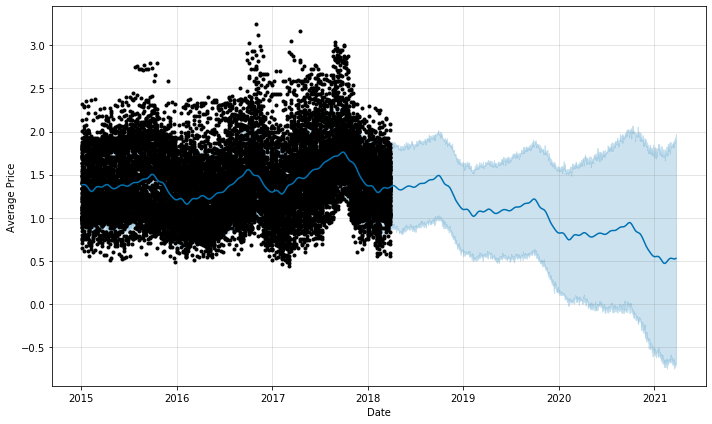

In [16]:
figure = predictor.plot(forecast, xlabel = 'Date', ylabel = 'Average Price')

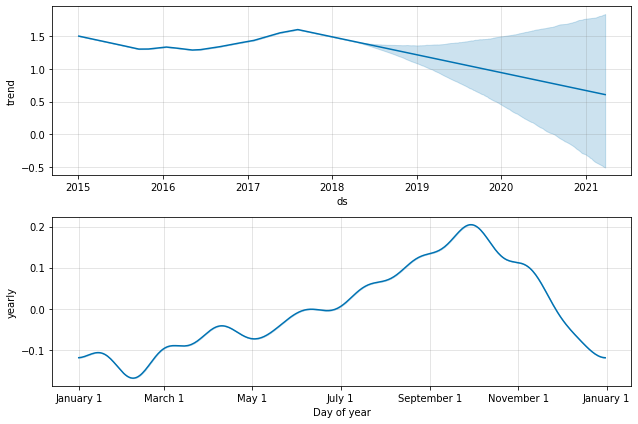

In [17]:
figure2 = predictor.plot_components(forecast)